# Deploy cloud-native apps using Azure Container Apps

# Prerequisites
- Basic understanding of cloud computing concepts: Familiarity with cloud computing fundamentals, such as virtualization, scalability, and on-demand resource provisioning.
- Knowledge of containers: Understanding the concept of containers, their benefits, and how they differ from traditional apps and virtual machines.
- Familiarity with container orchestration: Basic understanding of container orchestration platforms like Kubernetes and their role in managing containerized applications.
- Experience with Azure: Some familiarity with Microsoft Azure and its core container services, such as Azure Container Registry, Azure Kubernetes Service, and Azure Container Apps.
- Experience with deployments: Some familiarity with Azure DevOps or similar CI/CD tools for application deployment.
- Experience with networks: Some familiarity with networking concepts and Azure Virtual Networks.

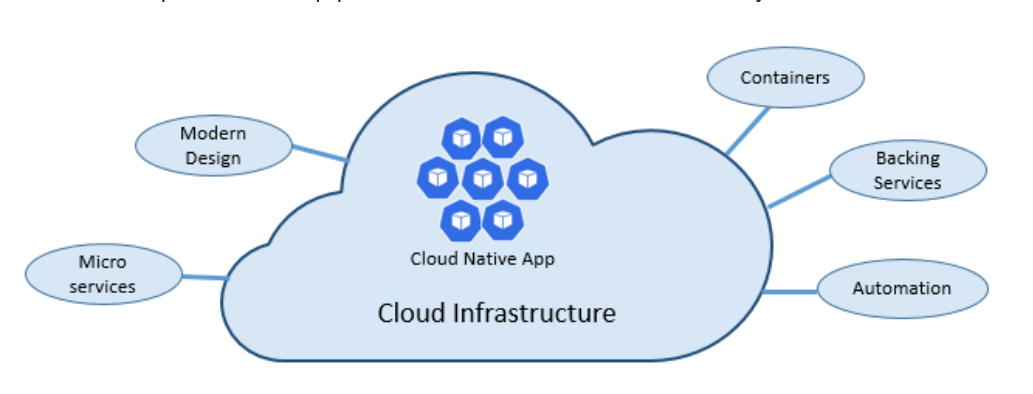

## Cloud infrastructure and the pillars of cloud-native
Cloud-native systems take full advantage of the cloud service model.

Designed to thrive in a dynamic, virtualized cloud environment, these systems make extensive use of Platform as a Service (PaaS) compute infrastructure and managed services. They treat the underlying infrastructure as disposable - provisioned in minutes and resized, scaled, or destroyed on demand – via automation.

## Azure Container Apps
Azure Container Apps enables you to build serverless microservices and jobs based on containers. Azure Container Apps doesn't provide direct access to the underlying Kubernetes APIs.

## Azure App Service
Azure App Service provides fully managed hosting for web applications including websites and web APIs.

## Azure Container Instances
Azure Container Instances (ACI) provides a single pod of Hyper-V isolated containers on demand. It's a simpler and more flexible option than Container Apps. Concepts like scale, load balancing, and certificates aren't provided with ACI containers. 

## Azure Kubernetes Service
Azure Kubernetes Service (AKS) provides a fully managed Kubernetes option in Azure. It supports direct access to the Kubernetes API and runs any Kubernetes workload.

## Azure Functions
Azure Functions is a serverless Functions-as-a-Service (FaaS) solution. It's optimized for running event-driven applications using the functions programming model. It shares many characteristics with Azure Container Apps around scale and integration with events, but optimized for ephemeral functions deployed as either code or containers. 

## Azure Spring Apps
Azure Spring Apps is a fully managed service for Java developers using the Spring Framework. If you want to run Spring Boot, Spring Cloud or any other Spring applications on Azure, Azure Spring Apps is an ideal option. 

## Azure Red Hat OpenShift
Azure Red Hat OpenShift is a joint project between Red Hat and Microsoft. The goal is to provide an integrated product and support experience for running Kubernetes-powered OpenShift. With Azure Red Hat OpenShift, teams can choose their own registry, networking, storage, and CI/CD solutions. 


# Scenario
You work for Fabrikam Inc. as part of a new operations team. The team is responsible for a brownfield application called Drone Delivery that has been running on Azure Kubernetes Service. An analysis has detected underutilization, especially with advanced AKS features like custom service mesh and autoscaling.

The team identifies an opportunity to simplify their implementation and enhance DevOps efficiency. They plan to evaluate using Azure Container Apps to host the Drone Delivery app. The migration to Container Apps aims to expedite the publication and scaling of containerized microservices, reduce complexity, and save resources. Container Apps retains the container advantages provided by the AKS solution.

# Solution architecture
Your operations team completes the planned migration. The Drone Delivery app that was running in Azure Kubernetes Services is now run in a newly created Azure Container Apps environment. This environment is optimized for running apps that span multiple microservices. Notable features include:

- Containers accessible via HTTPS ingress for external connections.
- Internal accessibility through DNS-based service discovery.
- Secure secrets management.
- Azure Key Vault resource authentication via managed identities.

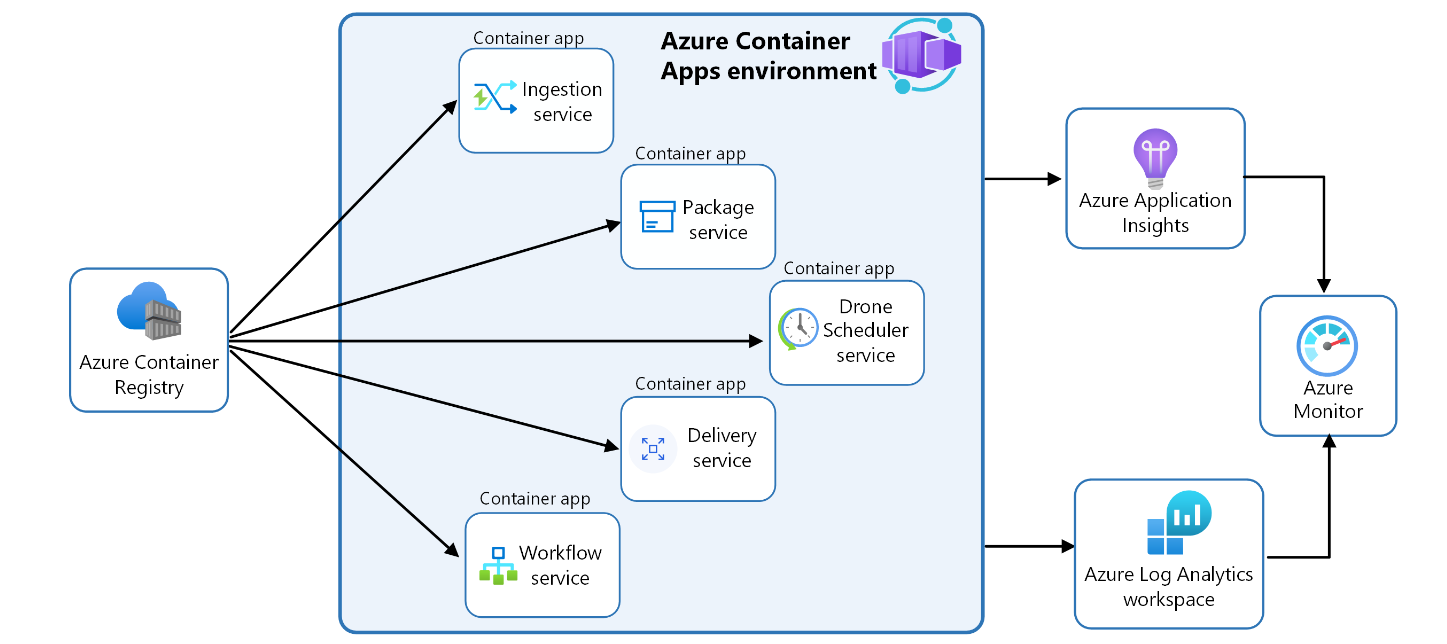

Container Apps features
This reference implementation uses Container Apps features in the following ways:

HTTPS Ingress: Used to expose the Ingestion service to the internet.
Internal Service Discovery: Ensures internal services (Delivery, DroneScheduler, and Package) can be reached by the Workflow service.
Managed Identities: User-assigned managed identities authenticate with Azure KeyVault from Delivery and DroneScheduler services.
Secrets Management: Secure management of secrets for Package, Ingestion, and Workflow services.
Container Registry: Fabrikam Drone Delivery leverages Azure Container Registry (ACR) for publishing Docker images.
Revisions: Azure Container Apps' revision feature is used for safe updates. The Workflow Service, operating as a message consumer, deploys in single revision mode.
Azure Resource Manager Templates: The application is deployed using Azure Resource Manager templates, simplifying deployment.
Log Analytics: Container logs are reviewed in Log Analytics without the need for additional configuration.

# Runtime architecture
In this scenario, the container images are sourced from Azure Container Registry and deployed to a Container Apps Environment. Since the app services share the same environment, they benefit from the following capabilities:

Internal ingress and service discovery.
A single Log Analytics workspace for runtime logging.
Secure management of secrets and certificates.

# Configure Azure Container Registry for container app deployments

Azure Container Registry is a managed registry service based on the open-source Docker Registry 2.0. It's used to store and manage container images and related artifacts.

cenario
Imagine you work for a software development company that builds and deploys containerized applications. Your team is responsible for managing the container images and ensuring they're easily accessible to the development and deployment pipelines. However, you're facing challenges in storing and managing these images efficiently. You need a solution that provides a secure and scalable way to store and manage container images. This is where Azure Container Registry comes in.

In [ ]:
# Azure CLI can also be used to create a resource group and container registry as follows:

Resource group: az group create --name RG1 --location centralus
Container Registry: az acr create --resource-group RG1 --name mycontainerregistryapl2003 --sku Premium

# Examine registry operations for image management
pre-requisites:
Azure container registry created
Azure CLI 
Docker Desktop CLI:

In [ ]:
az login # open a web broswer for logging into Azure
az acr login --name solariscontainerregistryinstance # log into azure container registry
docker pull mcr.microsoft.com/hello-world # to pull an image from a public register
# tag the image 
docker tag mcr.microsoft.com/hello-world solariscontainerregistryinstance.azurecr.io/hello-world:v1

# push the local image to registry instance, creating a repository 'hello-world' containing the image  
docker push solariscontainerregistryinstance.azurecr.io/hello-world:v1 
# remove the image from the local Docker environment (it is not removed in the Azure container registry )
docker rmi solariscontainerregistry.azurecr.io/hello-world:v1


In the Azure portal, to view the pushed image, open your container registry, and then select Repositories.

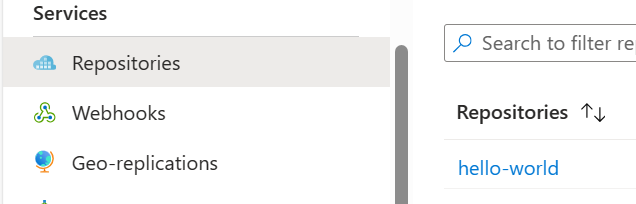

In [ ]:
docker pull solariscontainerregistryinstance.azurecr.io/hello-world:v1
# to remove image from the Azure container registry:
az acr repository delete --name solariscontainerregistryinstance --image hello-world:v1

# Why use a managed identity with container registry?
## System-assigned managed identities have their lifecycle tied to the resource that created them. 

## User-assigned managed identities can be used on multiple resources
You can create a user-assigned managed identity and assign it to one or more Azure Resources. When you enable a user-assigned managed identity:

- A service principal of a special type is created in Microsoft Entra ID for the identity. The service principal is managed separately from the resources that use it.
- Multiple resources are able to use the managed identity.
- You authorize the managed identity to have access to one or more services.

# Create a user-assigned managed identity
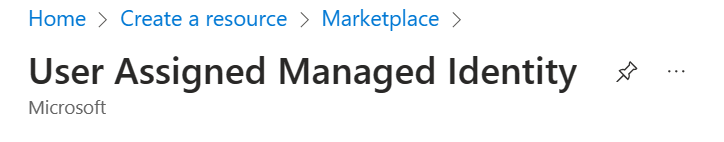

In [ ]:
az identity create -g RG1 -n uami-apl2003

## Role assignment process
## Examine secure communications using virtual networks#
Azure Virtual Network is a service that provides the fundamental building block for your private network in Azure. 
